## Proyecto 4

## Imports

In [2]:
import pandas as pd
import os

1. Crear una tabla de los archvivos con sus respectivas carpetas

In [3]:
contenido = os.listdir()
archvos_list = []
carpeta_list = []
carpeta_list1 = []
for carpeta in contenido:
    try: 
        archivos = os.listdir(carpeta)
        carpeta_list1.append(carpeta)
        for archivo in archivos:
            if archivo.endswith('wav'):
                archvos_list.append(archivo)
                carpeta_list.append(carpeta)
    except:
        print("No es una carpeta")
    #if os.path.isfile(os.path.join(fichero)) and fichero.endswith('wav'):
    #    imagenes.append(fichero)
   
df = pd.DataFrame()
df['Carpeta']  = carpeta_list
df['Archivos'] = archvos_list 
df

No es una carpeta
No es una carpeta
No es una carpeta
No es una carpeta
No es una carpeta
No es una carpeta


Carpeta               Archivos
0                     bed  00176480_nohash_0.wav
1                     bed  004ae714_nohash_0.wav
2                     bed  004ae714_nohash_1.wav
3                     bed  00f0204f_nohash_0.wav
4                     bed  00f0204f_nohash_1.wav
...                   ...                    ...
64722  _background_noise_      dude_miaowing.wav
64723  _background_noise_      exercise_bike.wav
64724  _background_noise_         pink_noise.wav
64725  _background_noise_        running_tap.wav
64726  _background_noise_        white_noise.wav

[64727 rows x 2 columns]

2. Clasificar las muestras 

In [4]:
clases_list = []
clasesID_list = []
for carpeta in df['Carpeta']:
    if carpeta == 'yes':
        clase = 'yes'
        id = 0
    elif carpeta == 'no':
        clase = 'no'
        id = 1
    elif carpeta == 'up':
        clase = 'up'
        id = 2
    elif carpeta == 'down':
        clase = 'down'
        id = 3
    elif carpeta == 'left':
        clase = 'left'
        id = 4
    elif carpeta == 'right':
        clase = 'right'
        id = 5
    elif carpeta == 'on':
        clase = 'on'
        id = 6
    elif carpeta == 'off':
        clase = 'off'
        id = 7
    elif carpeta == 'stop':
        clase = 'stop'
        id = 8
    elif carpeta == 'go':
        clase = 'go'
        id = 9
    elif carpeta == '_background_noise_':
        clase = 'silencio/rudio de fondo'
        id = 10
    else:
        clase = 'desconocido'
        id = 11
    clases_list.append(clase)
    clasesID_list.append(id)
df['Clase'] = clases_list
df['Clase ID'] = clasesID_list

df

Carpeta               Archivos                    Clase  \
0                     bed  00176480_nohash_0.wav              desconocido   
1                     bed  004ae714_nohash_0.wav              desconocido   
2                     bed  004ae714_nohash_1.wav              desconocido   
3                     bed  00f0204f_nohash_0.wav              desconocido   
4                     bed  00f0204f_nohash_1.wav              desconocido   
...                   ...                    ...                      ...   
64722  _background_noise_      dude_miaowing.wav  silencio/rudio de fondo   
64723  _background_noise_      exercise_bike.wav  silencio/rudio de fondo   
64724  _background_noise_         pink_noise.wav  silencio/rudio de fondo   
64725  _background_noise_        running_tap.wav  silencio/rudio de fondo   
64726  _background_noise_        white_noise.wav  silencio/rudio de fondo   

       Clase ID  
0            11  
1            11  
2            11  
3            11  
4            11  
...         ...  
64722        10  
64723        10  
64724        10  
64725        10  
64726        10  

[64727 rows x 4 columns]

3. Separar  el conjunto de entrenamiento y validacion

In [5]:
df_test= pd.DataFrame()
f = open('validation_list.txt')
carpetas_list = []
archivos_list = []
mensaje = f.read()
f.close()
carpeta_y_archivo = mensaje.split('\n')
for archivo in carpeta_y_archivo:
    archivo_list = archivo.split('/')
    if len(archivo_list) == 2:
        carpetas_list.append(archivo_list[0])
        archivos_list.append(archivo_list[1])
    #archivos_list.append(archivo_list[1])

df_test['Carpeta'] =  carpetas_list
df_test['Archivos'] =  archivos_list
df_test['Group'] = 'Test'
df_test

Carpeta               Archivos Group
0        bed  026290a7_nohash_0.wav  Test
1        bed  060cd039_nohash_0.wav  Test
2        bed  060cd039_nohash_1.wav  Test
3        bed  099d52ad_nohash_0.wav  Test
4        bed  0e17f595_nohash_0.wav  Test
...      ...                    ...   ...
6793    zero  fa7895de_nohash_0.wav  Test
6794    zero  fa7895de_nohash_1.wav  Test
6795    zero  fd32732a_nohash_0.wav  Test
6796    zero  fde2dee7_nohash_0.wav  Test
6797    zero  fde2dee7_nohash_1.wav  Test

[6798 rows x 3 columns]

In [6]:
df = pd.merge(df,df_test,how='outer')
df = df.fillna("Train")

In [7]:
df

Carpeta               Archivos                    Clase  \
0                     bed  00176480_nohash_0.wav              desconocido   
1                     bed  004ae714_nohash_0.wav              desconocido   
2                     bed  004ae714_nohash_1.wav              desconocido   
3                     bed  00f0204f_nohash_0.wav              desconocido   
4                     bed  00f0204f_nohash_1.wav              desconocido   
...                   ...                    ...                      ...   
64722  _background_noise_      dude_miaowing.wav  silencio/rudio de fondo   
64723  _background_noise_      exercise_bike.wav  silencio/rudio de fondo   
64724  _background_noise_         pink_noise.wav  silencio/rudio de fondo   
64725  _background_noise_        running_tap.wav  silencio/rudio de fondo   
64726  _background_noise_        white_noise.wav  silencio/rudio de fondo   

       Clase ID  Group  
0            11  Train  
1            11  Train  
2            11  Train  
3            11  Train  
4            11  Train  
...         ...    ...  
64722        10  Train  
64723        10  Train  
64724        10  Train  
64725        10  Train  
64726        10  Train  

[64727 rows x 5 columns]

In [8]:
grouped = df.groupby(df.Group)
df_test = grouped.get_group("Test")
df_test

Carpeta               Archivos        Clase  Clase ID Group
18        bed  026290a7_nohash_0.wav  desconocido        11  Test
35        bed  060cd039_nohash_0.wav  desconocido        11  Test
36        bed  060cd039_nohash_1.wav  desconocido        11  Test
45        bed  099d52ad_nohash_0.wav  desconocido        11  Test
66        bed  0e17f595_nohash_0.wav  desconocido        11  Test
...       ...                    ...          ...       ...   ...
64675    zero  fa7895de_nohash_0.wav  desconocido        11  Test
64676    zero  fa7895de_nohash_1.wav  desconocido        11  Test
64695    zero  fd32732a_nohash_0.wav  desconocido        11  Test
64701    zero  fde2dee7_nohash_0.wav  desconocido        11  Test
64702    zero  fde2dee7_nohash_1.wav  desconocido        11  Test

[6798 rows x 5 columns]

In [9]:
grouped = df.groupby(df.Group)
df_train = grouped.get_group("Train")
df_train

Carpeta               Archivos                    Clase  \
0                     bed  00176480_nohash_0.wav              desconocido   
1                     bed  004ae714_nohash_0.wav              desconocido   
2                     bed  004ae714_nohash_1.wav              desconocido   
3                     bed  00f0204f_nohash_0.wav              desconocido   
4                     bed  00f0204f_nohash_1.wav              desconocido   
...                   ...                    ...                      ...   
64722  _background_noise_      dude_miaowing.wav  silencio/rudio de fondo   
64723  _background_noise_      exercise_bike.wav  silencio/rudio de fondo   
64724  _background_noise_         pink_noise.wav  silencio/rudio de fondo   
64725  _background_noise_        running_tap.wav  silencio/rudio de fondo   
64726  _background_noise_        white_noise.wav  silencio/rudio de fondo   

       Clase ID  Group  
0            11  Train  
1            11  Train  
2            11  Train  
3            11  Train  
4            11  Train  
...         ...    ...  
64722        10  Train  
64723        10  Train  
64724        10  Train  
64725        10  Train  
64726        10  Train  

[57929 rows x 5 columns]

4. Espectograma

In [10]:
import librosa
import numpy as np
import pickle

In [11]:
def spectogram (audio_file):
    fs = 16000
    y, sr = librosa.load(audio_file, sr = 16000)
    if len(y) < fs:
       y = np.concatenate((y,np.zeros((fs-len(y)),dtype='int')))
    elif len(y) > fs:
        y = y[:fs]
    S = librosa.feature.melspectrogram(y=y, sr=fs, n_mels=40,n_fft =  25*fs//1000, win_length = 25*fs//1000, hop_length = 10*fs//1000, center=True,
        power=2)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB

In [12]:
audio_file = 'bed/00f0204f_nohash_0.wav'

En la siguiente celda se guarda el espectograma de cada archivo de audio en un archivo dentro de la carpeta 'espectogramas'. Estacelda esta comentada para que no se vuleva a correr en caso de reiniciar el Jupyter. 

In [13]:
#for i in range(len(df['Archivos'])):
#    file = df['Archivos'][i]
#    carpeta = df['Carpeta'][i]
#    path_audio = carpeta +  '/' + file
#    name, extension = file.split('.')
#    file_name = carpeta +  '_' +  name + '.pickle'
#    S_dB = spectogram (path_audio)   
#    path = 'espectogramas/'+ file_name
#    with open(path, "wb") as f:
#        pickle.dump(S_dB, f)

In [14]:
espectograma = []
for i in range(len(df['Archivos'])):
    file = df['Archivos'][i]
    carpeta = df['Carpeta'][i]
    name, extension = file.split('.')
    file_name = carpeta +  '_' +  name + '.pickle'
    espectograma.append(file_name)
df['Path de espectograma'] = espectograma
df

Carpeta               Archivos                    Clase  \
0                     bed  00176480_nohash_0.wav              desconocido   
1                     bed  004ae714_nohash_0.wav              desconocido   
2                     bed  004ae714_nohash_1.wav              desconocido   
3                     bed  00f0204f_nohash_0.wav              desconocido   
4                     bed  00f0204f_nohash_1.wav              desconocido   
...                   ...                    ...                      ...   
64722  _background_noise_      dude_miaowing.wav  silencio/rudio de fondo   
64723  _background_noise_      exercise_bike.wav  silencio/rudio de fondo   
64724  _background_noise_         pink_noise.wav  silencio/rudio de fondo   
64725  _background_noise_        running_tap.wav  silencio/rudio de fondo   
64726  _background_noise_        white_noise.wav  silencio/rudio de fondo   

       Clase ID  Group                     Path de espectograma  
0            11  Train             bed_00176480_nohash_0.pickle  
1            11  Train             bed_004ae714_nohash_0.pickle  
2            11  Train             bed_004ae714_nohash_1.pickle  
3            11  Train             bed_00f0204f_nohash_0.pickle  
4            11  Train             bed_00f0204f_nohash_1.pickle  
...         ...    ...                                      ...  
64722        10  Train  _background_noise__dude_miaowing.pickle  
64723        10  Train  _background_noise__exercise_bike.pickle  
64724        10  Train     _background_noise__pink_noise.pickle  
64725        10  Train    _background_noise__running_tap.pickle  
64726        10  Train    _background_noise__white_noise.pickle  

[64727 rows x 6 columns]

10. Valide visualmente los datos preprocesados:

In [15]:
import matplotlib.pyplot as plt
import librosa.display
import librosa.display

Para  efectos demostrativos se escoge un archivo de cada clase

In [16]:
df_clases_unicas = df.drop_duplicates(subset = "Clase")
df_clases_unicas = df_clases_unicas.reset_index()
df_clases_unicas

index             Carpeta               Archivos                    Clase  \
0       0                 bed  00176480_nohash_0.wav              desconocido   
1    6923                down  00176480_nohash_0.wav                     down   
2   16363                  go  004ae714_nohash_0.wav                       go   
3   22227                left  00176480_nohash_0.wav                     left   
4   28690                  no  012c8314_nohash_0.wav                       no   
5   31065                 off  00176480_nohash_0.wav                      off   
6   33422                  on  004ae714_nohash_0.wav                       on   
7   38159               right  00b01445_nohash_0.wav                    right   
8   47006                stop  004ae714_nohash_0.wav                     stop   
9   55848                  up  004ae714_nohash_0.wav                       up   
10  59968                 yes  004ae714_nohash_0.wav                      yes   
11  64721  _background_noise_   doing_the_dishes.wav  silencio/rudio de fondo   

    Clase ID  Group                        Path de espectograma  
0         11  Train                bed_00176480_nohash_0.pickle  
1          3  Train               down_00176480_nohash_0.pickle  
2          9  Train                 go_004ae714_nohash_0.pickle  
3          4  Train               left_00176480_nohash_0.pickle  
4          1  Train                 no_012c8314_nohash_0.pickle  
5          7  Train                off_00176480_nohash_0.pickle  
6          6  Train                 on_004ae714_nohash_0.pickle  
7          5  Train              right_00b01445_nohash_0.pickle  
8          8  Train               stop_004ae714_nohash_0.pickle  
9          2  Train                 up_004ae714_nohash_0.pickle  
10         0  Train                yes_004ae714_nohash_0.pickle  
11        10  Train  _background_noise__doing_the_dishes.pickle

Graficas un audio y un espectograma de cada clase

In [17]:
def plotAudio(audio_file):
    %matplotlib inline
    plt.figure(figsize=(14, 5))
    y, sr = librosa.load(audio_file, sr = 16000)
    librosa.display.waveshow(y, sr=16000)
    plt.show()
def plotSpectogram (specfile):
    with open(specfile, "rb") as f:
        S_dB = pickle.load(f)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S_dB, sr=16000,x_axis='time', y_axis='hz')
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.show()


    

Clase desconocido, Clase ID:11
Graficar Audio
bed/00176480_nohash_0.wav


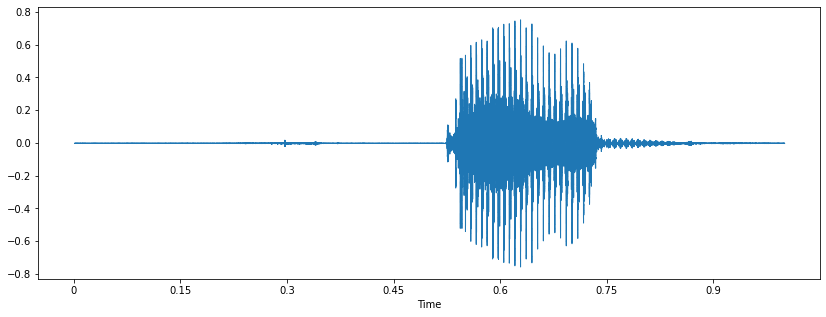

Graficar Espectograma
espectogramas/bed_00176480_nohash_0.pickle


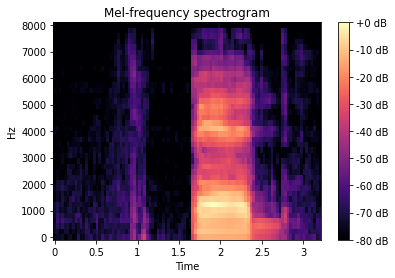

Clase down, Clase ID:3
Graficar Audio
down/00176480_nohash_0.wav


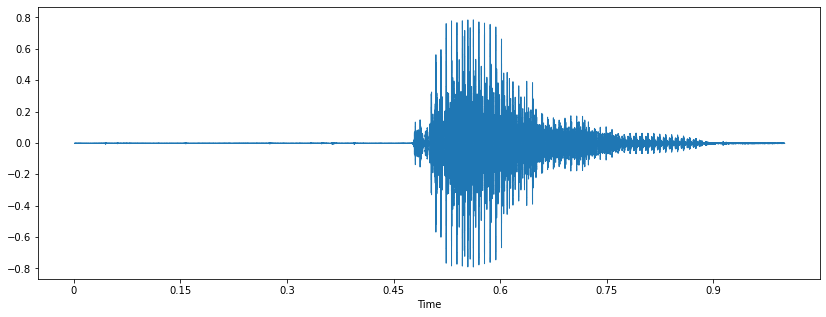

Graficar Espectograma
espectogramas/down_00176480_nohash_0.pickle


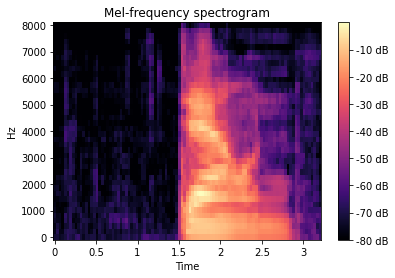

Clase go, Clase ID:9
Graficar Audio
go/004ae714_nohash_0.wav


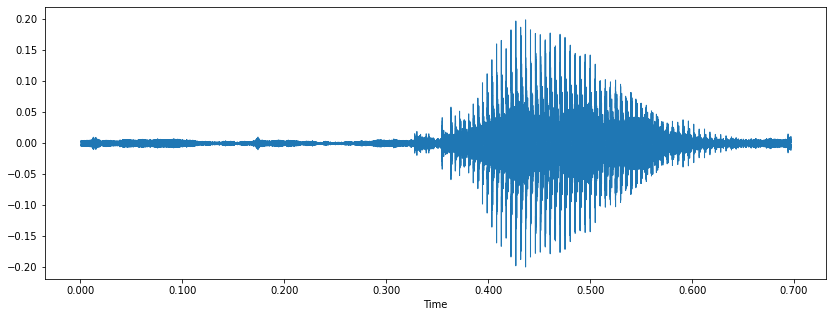

Graficar Espectograma
espectogramas/go_004ae714_nohash_0.pickle


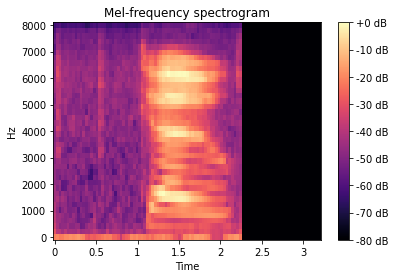

Clase left, Clase ID:4
Graficar Audio
left/00176480_nohash_0.wav


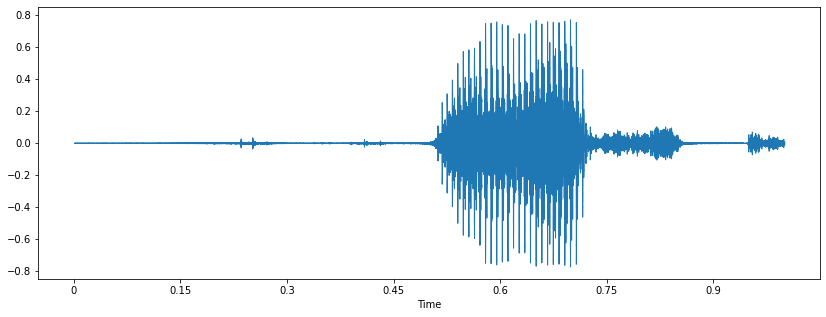

Graficar Espectograma
espectogramas/left_00176480_nohash_0.pickle


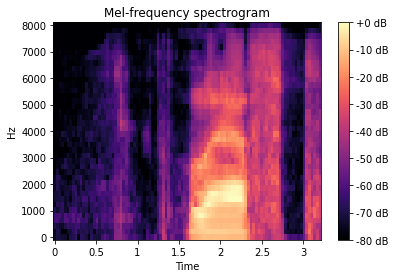

Clase no, Clase ID:1
Graficar Audio
no/012c8314_nohash_0.wav


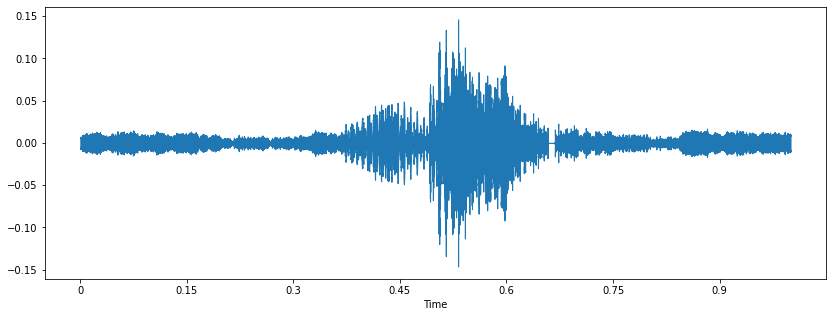

Graficar Espectograma
espectogramas/no_012c8314_nohash_0.pickle


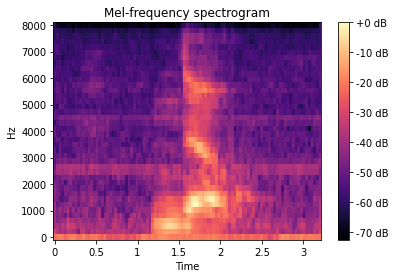

Clase off, Clase ID:7
Graficar Audio
off/00176480_nohash_0.wav


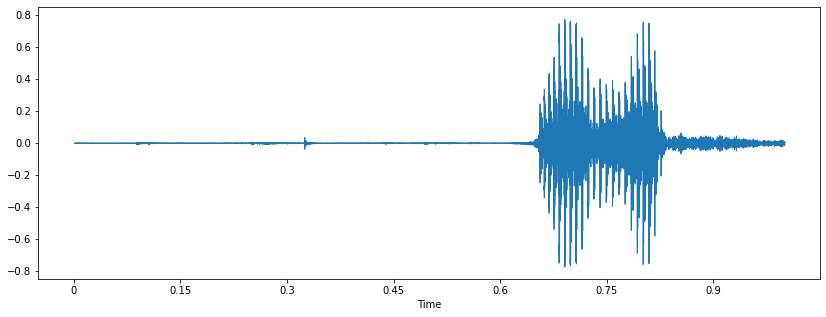

Graficar Espectograma
espectogramas/off_00176480_nohash_0.pickle


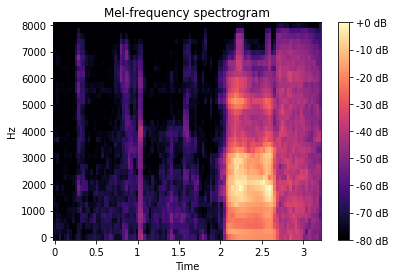

Clase on, Clase ID:6
Graficar Audio
on/004ae714_nohash_0.wav


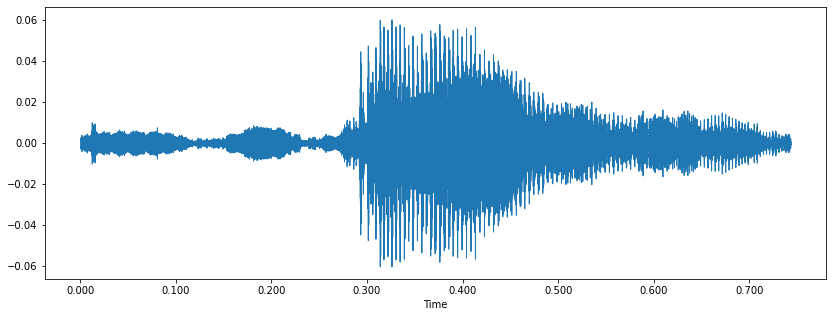

Graficar Espectograma
espectogramas/on_004ae714_nohash_0.pickle


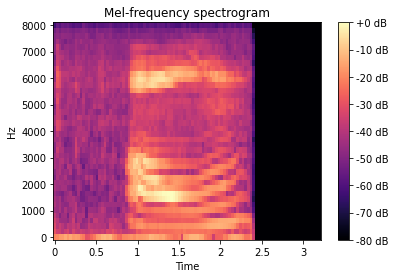

Clase right, Clase ID:5
Graficar Audio
right/00b01445_nohash_0.wav


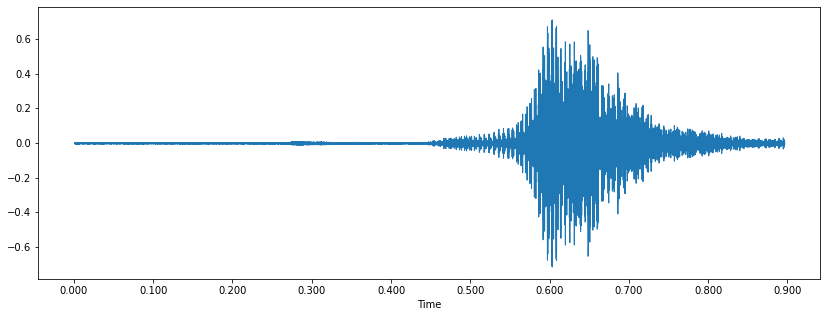

Graficar Espectograma
espectogramas/right_00b01445_nohash_0.pickle


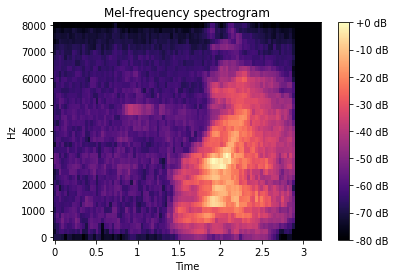

Clase stop, Clase ID:8
Graficar Audio
stop/004ae714_nohash_0.wav


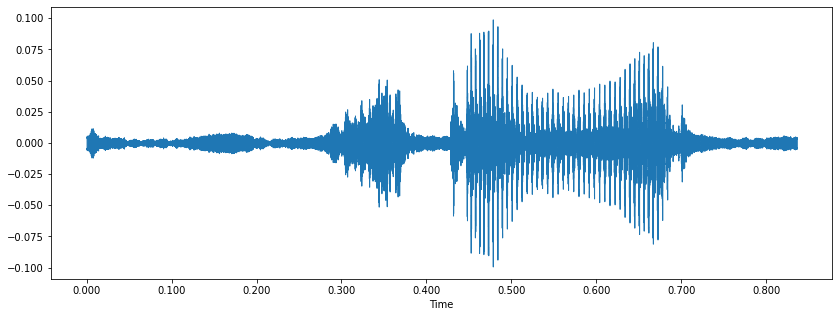

Graficar Espectograma
espectogramas/stop_004ae714_nohash_0.pickle


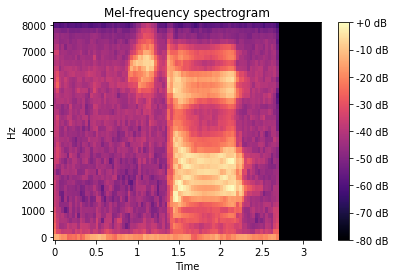

Clase up, Clase ID:2
Graficar Audio
up/004ae714_nohash_0.wav


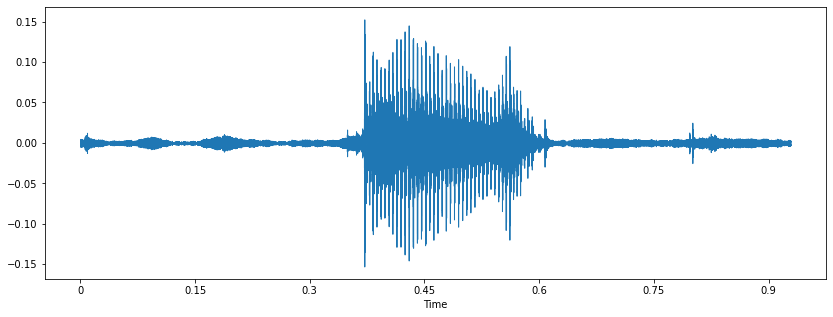

Graficar Espectograma
espectogramas/up_004ae714_nohash_0.pickle


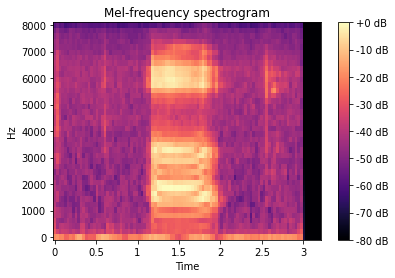

Clase yes, Clase ID:0
Graficar Audio
yes/004ae714_nohash_0.wav


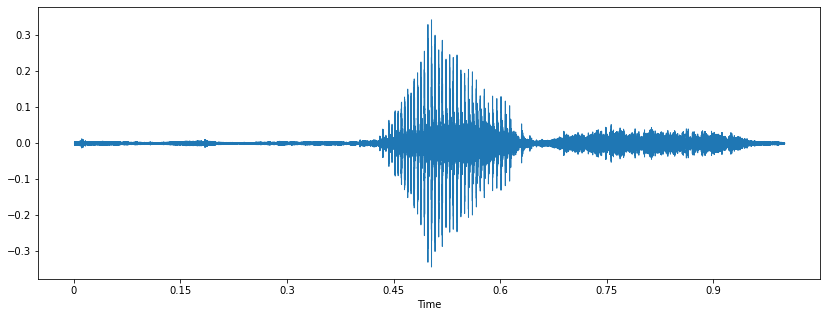

Graficar Espectograma
espectogramas/yes_004ae714_nohash_0.pickle


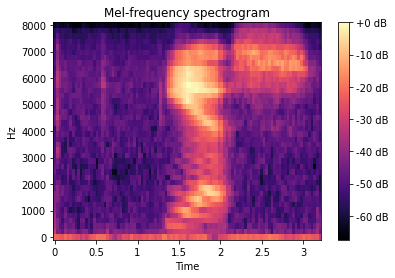

Clase silencio/rudio de fondo, Clase ID:10
Graficar Audio
_background_noise_/doing_the_dishes.wav


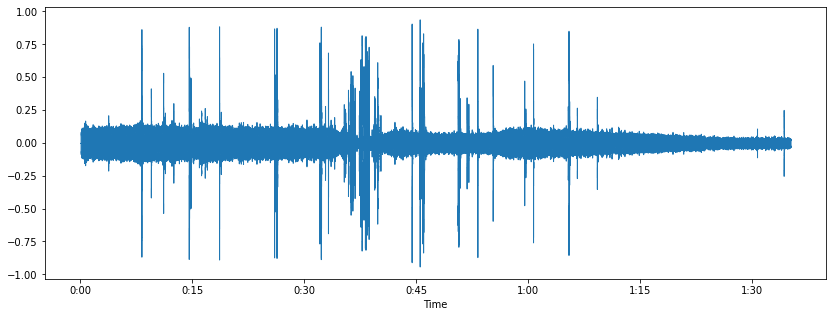

Graficar Espectograma
espectogramas/_background_noise__doing_the_dishes.pickle


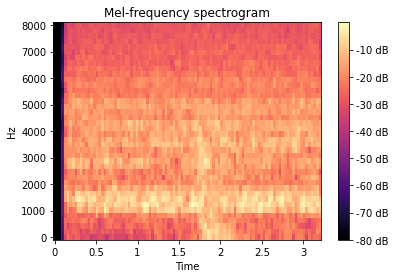

In [18]:
for i in range(len(df_clases_unicas['Clase'])):
    print('Clase ' + df_clases_unicas['Clase'][i] + ', Clase ID:' + str(df_clases_unicas['Clase ID'][i]) )
    print('Graficar Audio')
    path_audio = df_clases_unicas['Carpeta'][i] + '/' + df_clases_unicas['Archivos'][i]
    print(path_audio)
    plotAudio(path_audio)
    print('Graficar Espectograma')
    path_spect = 'espectogramas' + '/' + df_clases_unicas['Path de espectograma'][i]
    print(path_spect)
    plotSpectogram(path_spect)

Graficar histgorama

In [19]:
from scipy import stats 

In [24]:
spec = []
for i in range(len(df['Clase'])):
    path_spect = 'espectogramas' + '/' + df['Path de espectograma'][i]
    with open(path_spect, "rb") as f:
        S_dB = pickle.load(f)
    for listS in S_dB:
        for val in listS:
            spec.append(val)
spec = np.array(spec)
spec

array([-80.        , -74.69856262, -75.28205109, ...,  -9.42269135,
       -10.17160892, -16.52830887])

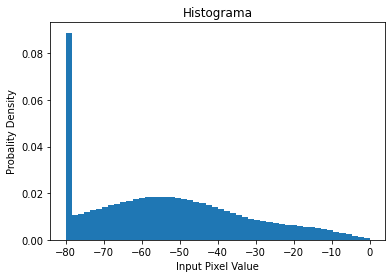

In [28]:
#path_spect = 'espectogramas' + '/' + 'bed_00176480_nohash_0.pickle'
#with open(path_spect, "rb") as f:
#        S_dB = pickle.load(f)
plt.hist(x=spec, bins=50, density=True)
plt.title('Histograma')
plt.xlabel('Input Pixel Value')
plt.ylabel('Probality Density')
plt.show() 

Revisar cantidad de datos de cada clase

In [31]:
freq = df.groupby(['Clase']).count() 
print(freq)

                         Carpeta  Archivos  Clase ID  Group  \
Clase                                                         
desconocido                41039     41039     41039  41039   
down                        2359      2359      2359   2359   
go                          2372      2372      2372   2372   
left                        2353      2353      2353   2353   
no                          2375      2375      2375   2375   
off                         2357      2357      2357   2357   
on                          2367      2367      2367   2367   
right                       2367      2367      2367   2367   
silencio/rudio de fondo        6         6         6      6   
stop                        2380      2380      2380   2380   
up                          2375      2375      2375   2375   
yes                         2377      2377      2377   2377   

                         Path de espectograma  
Clase                                          
desconocido          

Eliminar algunas  clases 

In [43]:
filas_desc_train = []
filas_desc_test = []
for i in range(len(df['Clase'])):
    if df['Clase'][i]  == 'desconocido' and df['Group'][i]  == 'Train':
        filas_desc_train.append(i)
    if df['Clase'][i]  == 'desconocido' and df['Group'][i]  == 'Test':
        filas_desc_test.append(i)
  

In [45]:
print(len(filas_desc_train))
print(len(filas_desc_test))

36818
4221


In [46]:
filas_desc_train = filas_desc_train[2000:]
filas_desc_test = filas_desc_test[1000:]
print(len(filas_desc_train))
print(len(filas_desc_test))

34818
3221


In [48]:
filas_desc = filas_desc_train + filas_desc_test 
df_dist = df.drop(filas_desc,axis=0)
df_dist = df_dist.reset_index()
df_dist

index             Carpeta               Archivos  \
0          0                 bed  00176480_nohash_0.wav   
1          1                 bed  004ae714_nohash_0.wav   
2          2                 bed  004ae714_nohash_1.wav   
3          3                 bed  00f0204f_nohash_0.wav   
4          4                 bed  00f0204f_nohash_1.wav   
...      ...                 ...                    ...   
26683  64722  _background_noise_      dude_miaowing.wav   
26684  64723  _background_noise_      exercise_bike.wav   
26685  64724  _background_noise_         pink_noise.wav   
26686  64725  _background_noise_        running_tap.wav   
26687  64726  _background_noise_        white_noise.wav   

                         Clase  Clase ID  Group  \
0                  desconocido        11  Train   
1                  desconocido        11  Train   
2                  desconocido        11  Train   
3                  desconocido        11  Train   
4                  desconocido        11  Train   
...                        ...       ...    ...   
26683  silencio/rudio de fondo        10  Train   
26684  silencio/rudio de fondo        10  Train   
26685  silencio/rudio de fondo        10  Train   
26686  silencio/rudio de fondo        10  Train   
26687  silencio/rudio de fondo        10  Train   

                          Path de espectograma  
0                 bed_00176480_nohash_0.pickle  
1                 bed_004ae714_nohash_0.pickle  
2                 bed_004ae714_nohash_1.pickle  
3                 bed_00f0204f_nohash_0.pickle  
4                 bed_00f0204f_nohash_1.pickle  
...                                        ...  
26683  _background_noise__dude_miaowing.pickle  
26684  _background_noise__exercise_bike.pickle  
26685     _background_noise__pink_noise.pickle  
26686    _background_noise__running_tap.pickle  
26687    _background_noise__white_noise.pickle  

[26688 rows x 7 columns]

In [49]:
freq = df_dist.groupby(['Clase']).count() 
print(freq)

                         index  Carpeta  Archivos  Clase ID  Group  \
Clase                                                                
desconocido               3000     3000      3000      3000   3000   
down                      2359     2359      2359      2359   2359   
go                        2372     2372      2372      2372   2372   
left                      2353     2353      2353      2353   2353   
no                        2375     2375      2375      2375   2375   
off                       2357     2357      2357      2357   2357   
on                        2367     2367      2367      2367   2367   
right                     2367     2367      2367      2367   2367   
silencio/rudio de fondo      6        6         6         6      6   
stop                      2380     2380      2380      2380   2380   
up                        2375     2375      2375      2375   2375   
yes                       2377     2377      2377      2377   2377   

                   

Histograma despues de eliminar clases

In [50]:
spec = []
for i in range(len(df_dist['Clase'])):
    path_spect = 'espectogramas' + '/' + df['Path de espectograma'][i]
    with open(path_spect, "rb") as f:
        S_dB = pickle.load(f)
    for listS in S_dB:
        for val in listS:
            spec.append(val)
spec = np.array(spec)

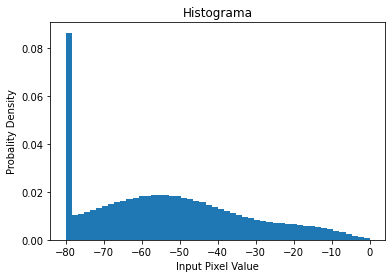

In [51]:
plt.hist(x=spec, bins=50, density=True)
plt.title('Histograma')
plt.xlabel('Input Pixel Value')
plt.ylabel('Probality Density')
plt.show()

6. Genere muestras de ruido de fondo:

In [63]:
import scipy.io.wavfile as waves
from itertools import accumulate

In [98]:
grouped = df.groupby(df.Clase)
df_ruido = grouped.get_group("silencio/rudio de fondo")
df_ruido = df_ruido.reset_index()
df_ruido 

index             Carpeta              Archivos                    Clase  \
0  64721  _background_noise_  doing_the_dishes.wav  silencio/rudio de fondo   
1  64722  _background_noise_     dude_miaowing.wav  silencio/rudio de fondo   
2  64723  _background_noise_     exercise_bike.wav  silencio/rudio de fondo   
3  64724  _background_noise_        pink_noise.wav  silencio/rudio de fondo   
4  64725  _background_noise_       running_tap.wav  silencio/rudio de fondo   
5  64726  _background_noise_       white_noise.wav  silencio/rudio de fondo   

   Clase ID  Group                        Path de espectograma  
0        10  Train  _background_noise__doing_the_dishes.pickle  
1        10  Train     _background_noise__dude_miaowing.pickle  
2        10  Train     _background_noise__exercise_bike.pickle  
3        10  Train        _background_noise__pink_noise.pickle  
4        10  Train       _background_noise__running_tap.pickle  
5        10  Train       _background_noise__white_noise.pickle

In [104]:
carpetas = []
archivos = []
for i in range(len(df_ruido['Carpeta'])): 
    carpeta = df_ruido['Carpeta'][i]
    archivo = df_ruido['Archivos'][i]
    archivo_audio = carpeta + '/' + archivo
    muestreo, sonido = waves.read(archivo_audio)
    duracion = len(sonido) /muestreo
    length_to_split =len(sonido)//duracion
    inicio = 0
    final = int(length_to_split)
    for i in range(int(duracion)):
        muestra  = sonido[inicio : final]
        inicio = final
        final = final + int(length_to_split)
        name, extensio = archivo.split('.')
        file_name = 'muestras_rudios' + '/' + name  + '_' + str(i) + '.wav'
        carpetas.append('muestras_rudios')
        archivos.append(name  + '_' + str(i) + '.wav')
        waves.write(file_name, muestreo, muestra)

C:\Users\psalazar\AppData\Local\Temp\ipykernel_12580\2144460583.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  muestreo, sonido = waves.read(archivo_audio)


In [110]:
dfruido = pd.DataFrame()
size = len(carpetas)
dfruido['Carpeta'] =  carpetas
dfruido['Archivos'] = archivos
dfruido['Clase'] = 'silencio/rudio de fondo'
dfruido['Clase ID'] =  11
group = []
for i in  range (size):
    if i%2 == 0:
        group.append("Train")
    else:
        group.append("Test")
dfruido['Group'] = group  
dfruido

Carpeta                Archivos                    Clase  \
0    muestras_rudios  doing_the_dishes_0.wav  silencio/rudio de fondo   
1    muestras_rudios  doing_the_dishes_1.wav  silencio/rudio de fondo   
2    muestras_rudios  doing_the_dishes_2.wav  silencio/rudio de fondo   
3    muestras_rudios  doing_the_dishes_3.wav  silencio/rudio de fondo   
4    muestras_rudios  doing_the_dishes_4.wav  silencio/rudio de fondo   
..               ...                     ...                      ...   
393  muestras_rudios      white_noise_55.wav  silencio/rudio de fondo   
394  muestras_rudios      white_noise_56.wav  silencio/rudio de fondo   
395  muestras_rudios      white_noise_57.wav  silencio/rudio de fondo   
396  muestras_rudios      white_noise_58.wav  silencio/rudio de fondo   
397  muestras_rudios      white_noise_59.wav  silencio/rudio de fondo   

     Clase ID  Group  
0          11  Train  
1          11   Test  
2          11  Train  
3          11   Test  
4          11  Train  
..        ...    ...  
393        11   Test  
394        11  Train  
395        11   Test  
396        11  Train  
397        11   Test  

[398 rows x 5 columns]